In [23]:
import numpy as np
from qiskit import *
from qiskit.providers import aer
from qiskit import Aer
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import plot_histogram

In [24]:
x1 = QuantumRegister(1,"x1")
x2 = QuantumRegister(1,"x2")
x3 = QuantumRegister(1,"x3")
x4 = QuantumRegister(1,"x4")
x5 = QuantumRegister(1,"x5")
x6 = QuantumRegister(1,"x6")
y1 = QuantumRegister(1,"y1")
y2 = QuantumRegister(1,"y2")
y3 = QuantumRegister(1,"y3")
y4 = QuantumRegister(1,"y4")
y5 = QuantumRegister(1,"y5")
y6 = QuantumRegister(1,"y6")
#y_reg = QuantumRegister(6,"y")

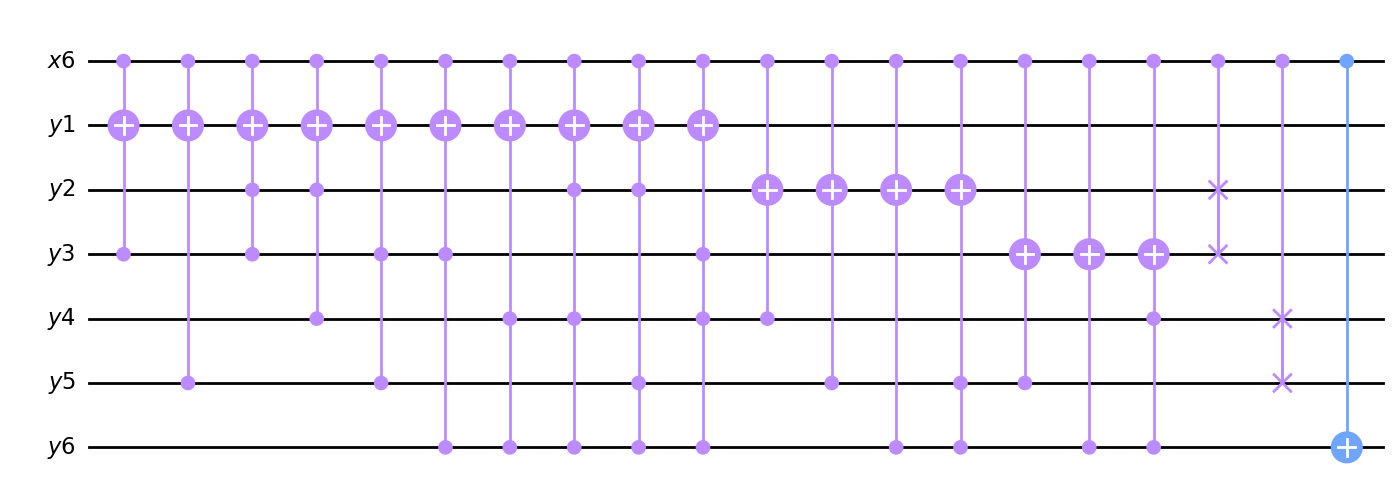

In [25]:
t_action = QuantumCircuit(x6,y1,y2,y3,y4,y5,y6, name=" [$t$ Gate] ")

# y_1 \mapsto (...)
t_action.ccx(x6,y3,y1)
t_action.ccx(x6,y5,y1)
t_action.mcx([x6,y2,y3],y1)
t_action.mcx([x6,y2,y4],y1)
t_action.mcx([x6,y3,y5],y1)
t_action.mcx([x6,y3,y6],y1)
t_action.mcx([x6,y4,y6],y1)
t_action.mcx([x6,y2,y4,y6],y1)
t_action.mcx([x6,y2,y5,y6],y1)
t_action.mcx([x6,y3,y4,y6],y1)


# y_2 \mapsto (...)
# y_3 \mapsto (...)
t_action.ccx(x6,y4,y2)
t_action.ccx(x6,y5,y2)
t_action.ccx(x6,y6,y2)
t_action.mcx([x6,y5,y6],y2)

t_action.ccx(x6,y5,y3)
t_action.ccx(x6,y6,y3)
t_action.mcx([x6,y4,y6],y3)

t_action.cswap(x6,y2,y3)


# y_4 \mapsto y_5
# y_5 \mapsto y_4
t_action.cswap(x6,y4,y5)

# y_6 \mapsto y_6 + 1
t_action.cx(x6,y6)

t_action.draw('mpl')

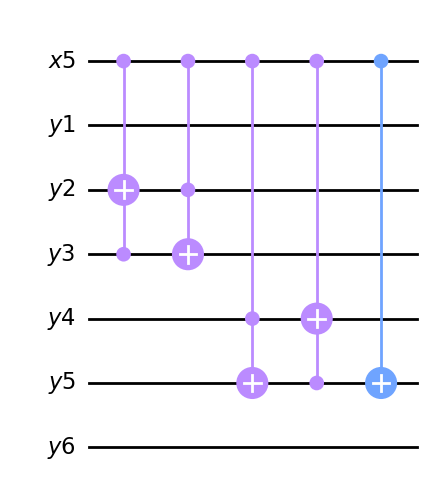

In [26]:
u1_action = QuantumCircuit(x5,y1,y2,y3,y4,y5,y6,name=" [$u^1$ Gate]")

# y2 \mapsto y2+y3
# y3 \mapsto y2
u1_action.ccx(x5,y3,y2)
u1_action.ccx(x5,y2,y3)

# y4 \mapsto y5
# y5 \mapsto y4+y5+1
u1_action.ccx(x5,y4,y5)
u1_action.ccx(x5,y5,y4)
u1_action.cx(x5,y5)


u1_action.draw("mpl")

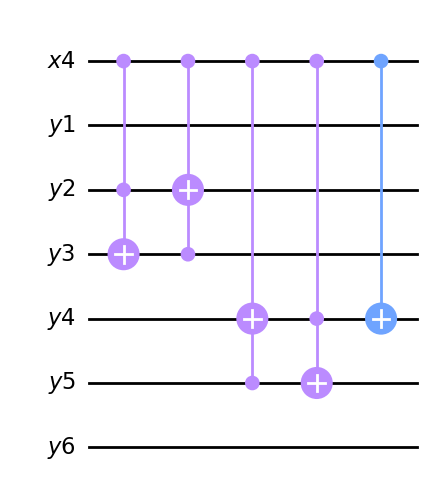

In [27]:
u2_action =  QuantumCircuit(x4,y1,y2,y3,y4,y5,y6,name=" [$u^2$ Gate]")

# y2 \mapsto y3
# y3 \mapsto y2+y3
u2_action.ccx(x4,y2,y3)
u2_action.ccx(x4,y3,y2)

# y4 \mapsto y4+y5+1
# y5 \mapsto y4
u2_action.ccx(x4,y5,y4)
u2_action.ccx(x4,y4,y5)
u2_action.cx(x4,y4)

u2_action.draw("mpl")

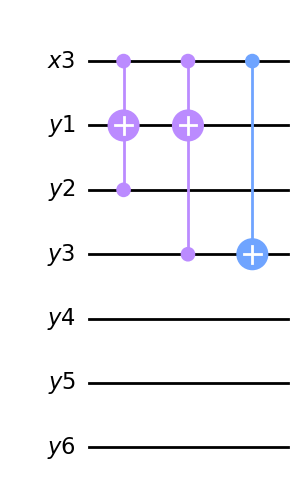

In [28]:
k_action =  QuantumCircuit(x3,y1,y2,y3,y4,y5,y6,name=" [$k$ Gate]")

# y1 \mapsto y1+y2+y3
k_action.ccx(x3,y2,y1)
k_action.ccx(x3,y3,y1)

# y3 \mapsto y3+1
k_action.cx(x3,y3)

k_action.draw("mpl")

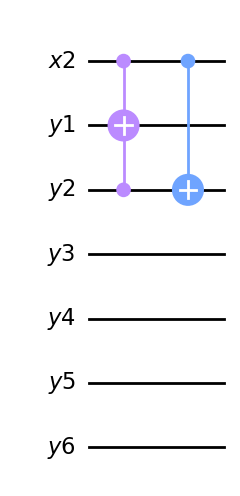

In [29]:
j_action =  QuantumCircuit(x2,y1,y2,y3,y4,y5,y6,name=" [$j$ Gate]")

# y1 \mapsto y1+y2
j_action.ccx(x2,y2,y1)

# y2 \mapsto y2+1
j_action.cx(x2,y2)

j_action.draw("mpl")

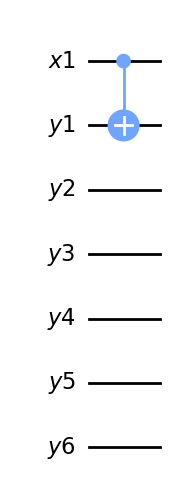

In [30]:
neg_action = QuantumCircuit(x1,y1,y2,y3,y4,y5,y6,name=" [$-1$ Gate]")

# y1 \mapsto y1+1
neg_action.cx(x1,y1)

neg_action.draw("mpl")

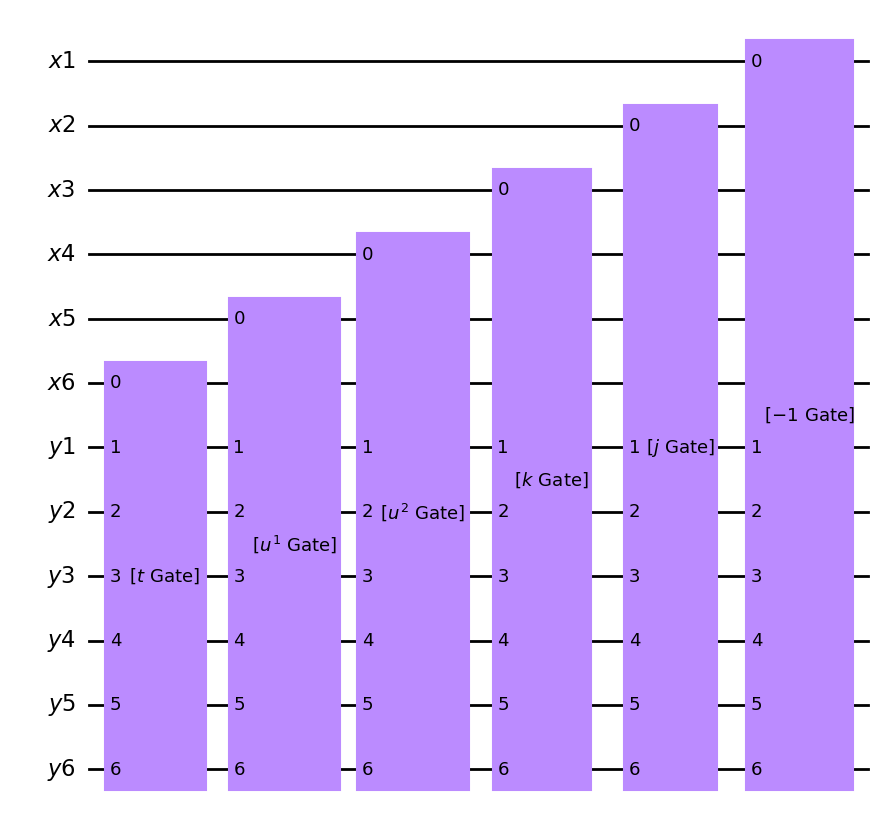

In [31]:
mult_circ = QuantumCircuit(x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6)
mult_circ.append(t_action,   [x6,y1,y2,y3,y4,y5,y6])
mult_circ.append(u1_action,  [x5,y1,y2,y3,y4,y5,y6])
mult_circ.append(u2_action,  [x4,y1,y2,y3,y4,y5,y6])
mult_circ.append(k_action,   [x3,y1,y2,y3,y4,y5,y6])
mult_circ.append(j_action,   [x2,y1,y2,y3,y4,y5,y6])
mult_circ.append(neg_action, [x1,y1,y2,y3,y4,y5,y6])
mult_circ.draw("mpl")

2^12 = 4096, so that it would be too hard to compute all cases on my computer here. 
The test bellow is from my attempt

In [77]:
backend_sim = Aer.get_backend('aer_simulator')

(b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12) = ([0,0] for n in range(0,12))
                                            
                       
results = {}
                       
for n in range(0,128):
    (_,_,xx1,xx2,xx3,xx4,xx5,xx6,yy1,yy2,yy3,yy4,yy5,yy6) = format(n, '#014b')
    (xx1,xx2,xx3,xx4,xx5,xx6,yy1,yy2,yy3,yy4,yy5,yy6) = map(int,(xx1,xx2,xx3,xx4,xx5,xx6,yy1,yy2,yy3,yy4,yy5,yy6))
    
    if xx4 == 1 and xx5 == 1:
        continue
        
    if yy4 ==1 and yy5 == 1:
        continue
    
    b1[xx1] = 1
    b1[(xx1 + 1) % 2] = 0 
    
    b2[xx2] = 1
    b2[(xx2 + 1) % 2] = 0 
    
    b3[xx3] = 1
    b3[(xx3 + 1) % 2] = 0 
    
    b4[xx4] = 1
    b4[(xx4 + 1) % 2] = 0 
    
    b4[xx4] = 1
    b4[(xx4 + 1) % 2] = 0 
    
    b5[xx5] = 1
    b5[(xx5 + 1) % 2] = 0 
    
    b6[xx6] = 1
    b6[(xx6 + 1) % 2] = 0 
    
    b7[yy1] = 1
    b7[(yy1 + 1) % 2] = 0 
    
    b8[yy2] = 1
    b8[(yy2 + 1) % 2] = 0 
    
    b9[yy3] = 1
    b9[(yy3 + 1) % 2] = 0 
    
    b10[yy4] = 1
    b10[(yy4 + 1) % 2] = 0 
    
    b11[yy4] = 1
    b11[(yy4 + 1) % 2] = 0 
    
    b12[yy5] = 1
    b12[(yy5 + 1) % 2] = 0 
    
    mult_circ.initialize(b1, x1)
    mult_circ.initialize(b2, x2)
    mult_circ.initialize(b3, x3)
    mult_circ.initialize(b4, x4)
    mult_circ.initialize(b5, x5)
    mult_circ.initialize(b6, x6)
    mult_circ.initialize(b7, y1)
    mult_circ.initialize(b8, y2)
    mult_circ.initialize(b9, y3)
    mult_circ.initialize(b10, y4)
    mult_circ.initialize(b11, y5)
    mult_circ.initialize(b12, y6)
    
    mult_circ.measure_all()
    
    job_sim = backend_sim.run(transpile(mult_circ, backend_sim), shots=1)
    result_sim = job_sim.result()
    counts = result_sim.get_counts()
    results[n] = list(counts)[0][::-1]

In [67]:
tests = []
for k,v in results.items():
    (_,_,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6) = format(k, '#014b')
    (x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6) = map(int,(x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6))
    
    if x4 == 1 and x5 == 1:
        continue
        
    if y4 ==1 and y5 == 1:
        continue
        
    resultant = tuple(map(int,tuple(v)))
    
    
    z1 = (x2*x4*x6*y4*y6 + x3*x5*x6*y4*y6 + x2*x4*x6*y5*y6 + x3*x4*x6*y5*y6 + x2*x5*x6*y5*y6 + x3*x4*x6*y2 + x2*x5*x6*y2 + x3*x5*x6*y2 + x3*x4*x6*y3 + x2*x5*x6*y3 + x3*x5*x6*y3 + x2*x4*x6*y4 + x3*x4*x6*y4 + x2*x5*x6*y4 + x3*x4*x6*y5 + x2*x5*x6*y5 + x3*x5*x6*y5 + x3*x4*x6*y6 + x2*x5*x6*y6 + x3*x5*x6*y6 + x2*x6*y4*y6 + x3*x6*y4*y6 + x6*y2*y4*y6 + x6*y3*y4*y6 + x3*x6*y5*y6 + x6*y2*y5*y6 + x2*x4*y2 + x3*x5*y2 + x2*x6*y2 + x2*x4*y3 + x3*x4*y3 + x2*x5*y3 + x2*x6*y3 + x6*y2*y3 + x3*x6*y4 + x6*y2*y4 + x2*x6*y5 + x6*y3*y5 + x2*x6*y6 + x6*y3*y6 + x6*y4*y6 + x2*y2 + x3*y2 + x3*y3 + x6*y3 + x6*y5 + x1 + y1) % 2
    z2 = (x4*x6*y4*y6 + x4*x6*y5*y6 + x5*x6*y5*y6 + x5*x6*y2 + x5*x6*y3 + x4*x6*y4 + x5*x6*y4 + x5*x6*y5 + x5*x6*y6 + x6*y4*y6 + x4*y2 + x6*y2 + x4*y3 + x5*y3 + x6*y3 + x6*y5 + x6*y6 + x2 + y2) % 2
    z3 = (x4*x6*y4*y6 + x5*x6*y4*y6 + x5*x6*y5*y6 + x4*x6*y2 + x4*x6*y3 + x5*x6*y4 + x4*x6*y5 + x4*x6*y6 + x6*y5*y6 + x4*y2 + x5*y2 + x6*y2 + x5*y3 + x6*y3 + x6*y4 + x6*y5 + x6*y6 + x3 + y3) % 2
    z4 = (x4*x6*y4 + x4*x6*y5 + x5*y4 + x6*y4 + x4*y5 + x5*y5 + x6*y5 + x4 + y4) % 2
    z5 = (x5*x6*y4 + x5*x6*y5 + x4*y4 + x5*y4 + x6*y4 + x4*y5 + x6*y5 + x5 + y5) % 2
    z6 = (x6 + y6) % 2
    
#     test = z6 == int(v[5],2)
    
    test = (z1,z2,z3,z4,z5,z6) == resultant
    #print((x1,x2,x3,x4,x5,x6),(z1,z2,z3,z4,z5,z6),tuple(map(int,tuple(v))))

    
    tests.append(test)
    
    print(k)
    print(resultant)
    print(z1,z2,z3,z4,z5,z6)
    
# all(tests)



ValueError: invalid literal for int() with base 10: ' '

Instead we need to try to be a bit more clever. I will try generating each y and testing that each x behaves correctly when multiplied onto it.